#Data cleaning univariate, bivariate and statistical analysis	

# import the libraries

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

import os
import matplotlib.pyplot as plt



In [5]:
df=pd.read_csv("FastFoodRestaurants.csv")
df.head()

,index,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [3]:

df.columns

Index(['index', 'address', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'websites'],
      dtype='object')

In [6]:
print('Total no of columns:',df.shape[1])
print('Total no of rows:',df.shape[0])

Total no of columns: 11
Total no of rows: 10000


In [4]:

df.shape

(10000, 11)

In [7]:
print('countries are:',df.country.unique())
print('city are:',df.city.unique())

countries are: ['US']
city are: ['Massena' 'Washington Court House' 'Maysville' ... 'Chatham' 'Miles City'
 'East Chicago']


Text(0, 0.5, 'count')

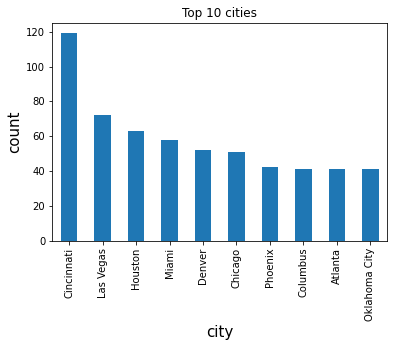

In [8]:
cityplt=df.city.value_counts()[:10].plot.bar(title='Top 10 cities')
cityplt.set_xlabel('city',size=15)
cityplt.set_ylabel('count',size=15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       10000 non-null  int64  
 1   address     10000 non-null  object 
 2   city        10000 non-null  object 
 3   country     10000 non-null  object 
 4   keys        10000 non-null  object 
 5   latitude    10000 non-null  float64
 6   longitude   10000 non-null  float64
 7   name        10000 non-null  object 
 8   postalCode  10000 non-null  object 
 9   province    10000 non-null  object 
 10  websites    9535 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.5+ KB


In [6]:
df.dtypes

index           int64
address        object
city           object
country        object
keys           object
latitude      float64
longitude     float64
name           object
postalCode     object
province       object
websites       object
dtype: object

In [7]:
df.describe()

,index,latitude,longitude
count,10000.00000,10000.000000,10000.000000
mean,4999.50000,37.552195,-91.056132
std,2886.89568,5.050275,18.556339
min,0.00000,-6.244273,-159.378915
25%,2499.75000,34.028706,-97.412631
50%,4999.50000,38.298216,-87.660930
75%,7499.25000,41.116765,-81.458351
max,9999.00000,64.840240,123.012361


In [8]:
df.isnull().sum()

index           0
address         0
city            0
country         0
keys            0
latitude        0
longitude       0
name            0
postalCode      0
province        0
websites      465
dtype: int64

<AxesSubplot:>

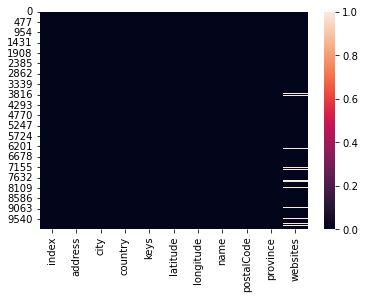

In [9]:
sns.heatmap(df.isnull())

In [15]:
print("Number of unique restaurant:", df['name'].nunique())

Number of unique restaurant: 548


Text(0, 0.5, 'count')

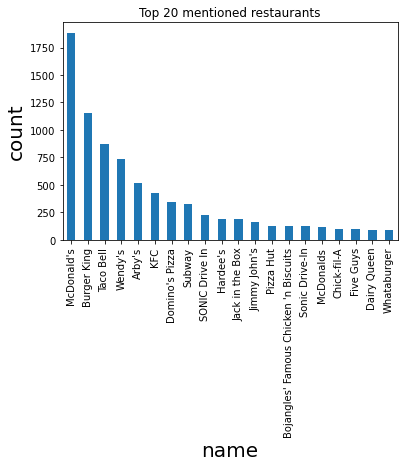

In [14]:
nameplot=df['name'].value_counts()[:20].plot.bar(title='Top 20 mentioned restaurants')
nameplot.set_xlabel('name',size=20)
nameplot.set_ylabel('count',size=20)

Text(0, 0.5, 'count')

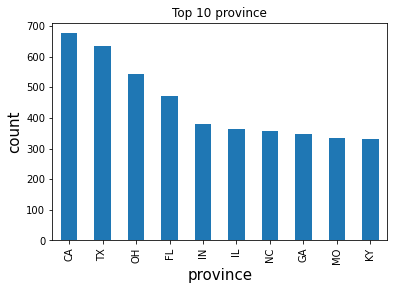

In [16]:
provplt=df.province.value_counts()[:10].plot.bar(title='Top 10 province')
provplt.set_xlabel('province',size=15)
provplt.set_ylabel('count',size=15)

Text(0, 0.5, 'count')

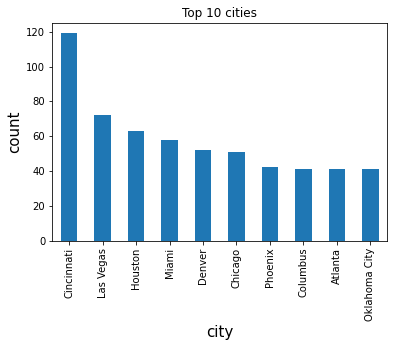

In [17]:
cityplt=df.city.value_counts()[:10].plot.bar(title='Top 10 cities')
cityplt.set_xlabel('city',size=15)
cityplt.set_ylabel('count',size=15)

Text(0, 0.5, 'count')

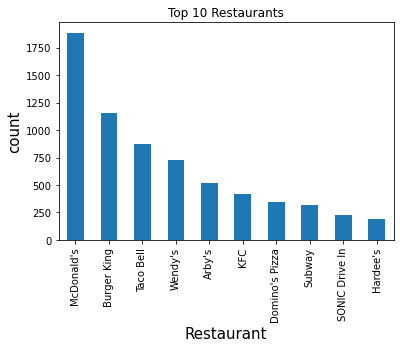

In [18]:

nameplt=df.name.value_counts()[:10].plot.bar(title="Top 10 Restaurants")
nameplt.set_xlabel('Restaurant',size=15)
nameplt.set_ylabel('count',size=15)

In [9]:
df.name.value_counts()[:10]

McDonald's        1886
Burger King       1154
Taco Bell          873
Wendy's            731
Arby's             518
KFC                421
Domino's Pizza     345
Subway             322
SONIC Drive In     226
Hardee's           192
Name: name, dtype: int64

In [11]:
df['text'] = df['name'] + ',' + df['province'] + ', ' + df['country']

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['text'],
        mode = 'markers',
        marker = dict(
            size = 4,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=.5,
                color='rgba(102, 102, 102)'
            )))]
layout = dict(
        title = 'Restaurants across the country',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='all restaurants' )

NameError: name 'iplot' is not defined

# data cleaning.

# Now if we observe carefully, there are some columns that obviously do not affect main data like ‘index’ , ‘keys’, .
 We will get rid of these redundant columns.

In [20]:
df = df.drop(['index', 'keys'],axis = 1)
df.head()

,address,city,country,latitude,longitude,name,postalCode,province,websites,text
0,324 Main St,Massena,US,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...","McDonald's,NY, US"
1,530 Clinton Ave,Washington Court House,US,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com,"Wendy's,OH, US"
2,408 Market Square Dr,Maysville,US,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com...","Frisch's Big Boy,KY, US"
3,6098 State Highway 37,Massena,US,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...","McDonald's,NY, US"
4,139 Columbus Rd,Athens,US,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse...","OMG! Rotisserie,OH, US"


#Now, we should have 9 columns left.

Let’s check whether there are duplicates in our data.

In [23]:
df.duplicated().sum()

0

#On running this code, we see that there are no duplicates to take care of.

Now, let us check the name column.

In [25]:
df.name.value_counts()

McDonald's                      1886
Burger King                     1154
Taco Bell                        873
Wendy's                          731
Arby's                           518
                                ... 
Charcoal Delights                  1
Jim's Coney Island                 1
The Great Steak & Potato Co.       1
Hot Dog Heaven                     1
Lee's Oriental Martial Arts        1
Name: name, Length: 548, dtype: int64

#If we observe we can see that latitude  has max value 64.840240  and min value -6.244273 which is 
a big range and -6.24 probably is some wrong value. We don’t know that yet! But, 
something seems definitely wrong! Let’s analyze this and see if we can get rid of the outliers if any.

In [1]:
plt.scatter(df.index, df['latitude'])

NameError: name 'plt' is not defined

#Graphs and plots can be relied on heavily when it comes to EDA.
These simple steps easily help to visualize and identify with first
look whether some outliers are there. This plot clearly shows that the values 
mostly lie in 20-50 range and we can safely drop values less than 20 which can introduce unnecessary bias.

In [8]:
df = df[(df['latitude'] > 20)]

 # univariate analysis

In [2]:
# Let's calculate the percentage of each city status category.
df.city.value_counts(normalize=True)



NameError: name 'df' is not defined

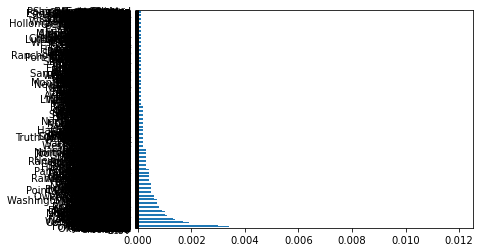

In [13]:
#plot the bar graph of percentage job categories
df.city.value_counts(normalize=True).plot.barh()
plt.show()

Now, let’s analyze the name Variable from the dataset. Since we’ve already seen a bar plot, let’s see how a Pie Chart looks like.

In [14]:
#calculate the percentage of each name category.
df.name.value_counts(normalize=True)



McDonald's                     0.188770
Burger King                    0.115304
Taco Bell                      0.087279
Wendy's                        0.073166
Arby's                         0.051847
                                 ...   
The People Connection          0.000100
JCW's                          0.000100
Mc Donalds                     0.000100
Kum Go                         0.000100
Lee's Oriental Martial Arts    0.000100
Name: name, Length: 545, dtype: float64

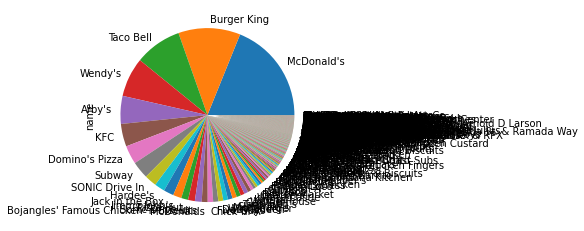

In [15]:
#plot the pie chart of name categories
df.name.value_counts(normalize=True).plot.pie()
plt.show()

By the above analysis, we can infer that the data set has a large number of them belongs to McDonald's after that burger king and teco bell. Also, a very small percentage of them have been unknown.

# Bivariate Analysis

Scatter Plot

Let’s take three columns ‘name’, ‘latitude’ and ‘longitude’ from our dataset and see what we can infer by plotting to scatter plot between name latitude and name longitude

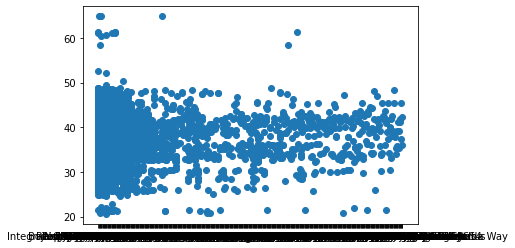

In [17]:
#plot the scatter plot of name and latutude variable in data
plt.scatter(df.name,df.latitude)
plt.show()



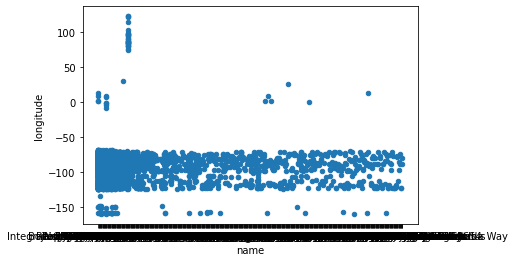

In [19]:
#plot the scatter plot of name and longitude variable in data
df.plot.scatter(x="name",y="longitude")
plt.show()

Pair Plot

Now, let’s plot Pair Plots for the three columns we used in plotting Scatter plots. We’ll use the seaborn library for plotting Pair Plots.



C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


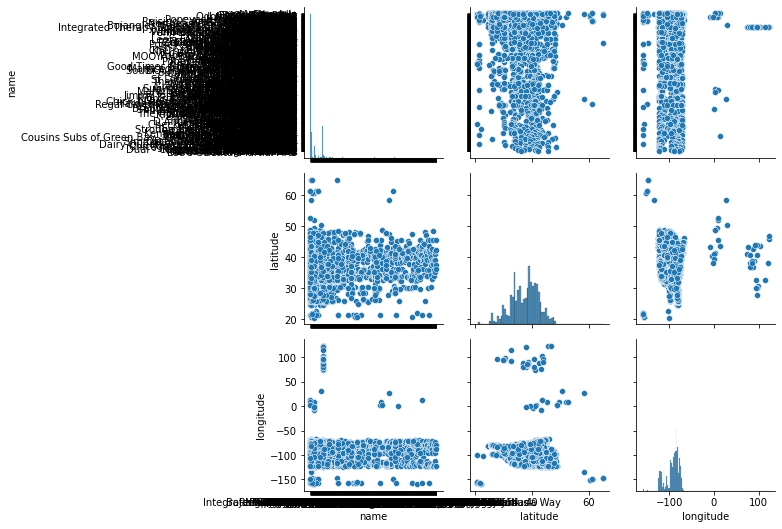

In [20]:
#plot the pair plot of name, latitude and longitude in data dataframe.
sns.pairplot(data = df, vars=['name','latitude','longitude'])
plt.show()

Correlation Matrix

Since we cannot use more than two variables as x-axis and y-axis in Scatter and Pair Plots, it is difficult to see the relation between three numerical variables in a single graph. In those cases, we’ll use the correlation matrix.



In [21]:
# Creating a matrix using name, latitude, longitude as rows and columns
df[['name','latitude','longitude']].corr()



,latitude,longitude
latitude,1.000000,0.028809
longitude,0.028809,1.000000


# boxplot

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


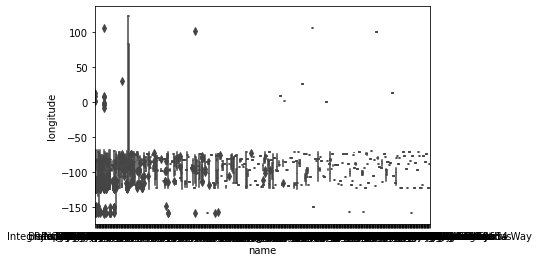

In [10]:
sns.boxplot(df.name, df.longitude)
plt.show()

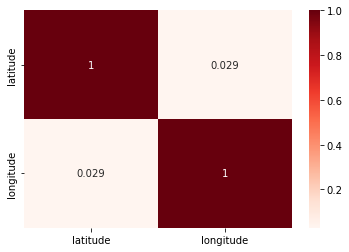

In [23]:
#plot the correlation matrix of name, latitude, longitude in data dataframe.
sns.heatmap(df[['name','latitude','longitude']].corr(), annot=True, cmap = 'Reds')
plt.show()

First, we created a matrix using name, latitude, longitude . After that, we are plotting the heatmap using the seaborn library of the matrix.

# MULTIVARIATE ANALYSIS

# If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.

Let’s see how ‘name’, ‘latitude’, and ‘longitude’ vary with each other.

First, we’ll create a pivot table with the three columns and after that, we’ll create a heatmap.

 multivariate analysis can not be able to do because there is only two columns in this data set.